In [83]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import xarray as xr
import numpy as np
import pandas as pd
import glob
import calendar
import seaborn as sns
import seaborn_image as isns

In [84]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

In [85]:
import plotly.graph_objects as go
import plotly.express as px

In [86]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [87]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [88]:
data_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/ALK_Baseline_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 100))

In [89]:
data_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/ALK_OAE_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 100))

In [90]:
data_baseline = data_baseline.where(data_baseline)
data_oae = data_oae.where(data_oae)

In [91]:
dataframe_base = data_baseline.sel(time_counter=slice('2090', '2100'))

In [92]:
dataframe_oae = data_oae.sel(time_counter=slice('2090', '2100'))

In [93]:
alk_max_base = dataframe_base.resample(time_counter='AS').max('time_counter')
alk_max_base = dataframe_base.groupby('time_counter.year').max('time_counter')

In [94]:
alk_min_base = dataframe_base.resample(time_counter='AS').min('time_counter')
alk_min_base = dataframe_base.groupby('time_counter.year').min('time_counter')

In [95]:
alk_amplitude_base = alk_max_base['ALK'] - alk_min_base['ALK']

In [96]:
alk_amplitude_base = alk_amplitude_base.to_dataset()

In [97]:
alk_amplitude_base_map = alk_amplitude_base.ALK.mean(dim=('year', 'deptht'))

In [98]:
alk_amplitude_base_map = alk_amplitude_base_map.to_dataset()

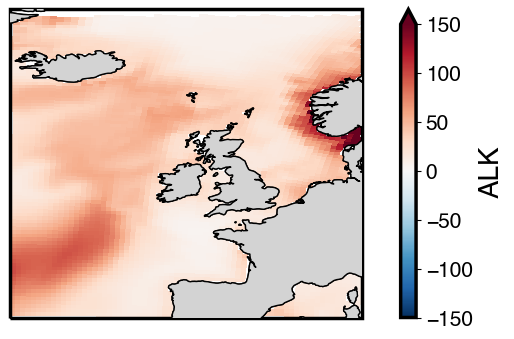

In [99]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

alk_amplitude_base_map.ALK.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=True, vmin = -150, vmax = 150, cmap="RdBu_r"
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

In [100]:
alk_max_oae = dataframe_oae.resample(time_counter='AS').max('time_counter')
alk_max_oae = dataframe_oae.groupby('time_counter.year').max('time_counter')

In [101]:
alk_min_oae = dataframe_oae.resample(time_counter='AS').min('time_counter')
alk_min_oae = dataframe_oae.groupby('time_counter.year').min('time_counter')

In [102]:
alk_amplitude_oae = alk_max_oae['ALK'] - alk_min_oae['ALK']

In [103]:
alk_amplitude_oae = alk_amplitude_oae.to_dataset()

In [104]:
alk_amplitude_oae_map = alk_amplitude_oae.ALK.mean(dim=('year', 'deptht'))

In [105]:
alk_amplitude_oae_map = alk_amplitude_oae_map.to_dataset()

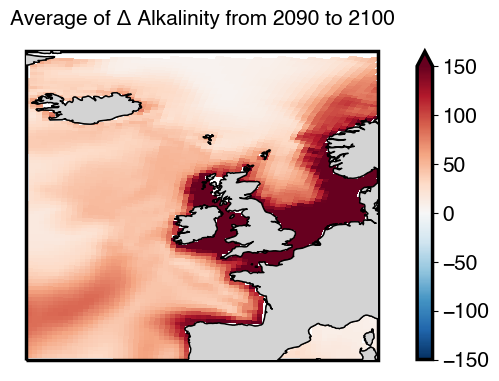

In [113]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

alk_amplitude_oae_map.ALK.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=True, add_labels=False, vmin = -150, vmax = 150, cmap="RdBu_r"
)
ax.coastlines()
ax.set_title('Average of Δ Alkalinity from 2090 to 2100', fontname="Helvetica", fontsize=15, y=1.06)
ax.set_extent([-25, 10, 40, 70])

In [ ]:
dataframe_base_map = data_baseline.sel(time_counter=slice('2025', '2100'))

In [38]:
dataframe_oae_map = data_oae.sel(time_counter=slice('2025', '2100'))

In [39]:
alk_max_base_map = dataframe_base_map.resample(time_counter='AS').max('time_counter')
alk_max_base_map = dataframe_base_map.groupby('time_counter.year').max('time_counter')

In [40]:
alk_min_base_map = dataframe_base_map.resample(time_counter='AS').min('time_counter')
alk_min_base_map = dataframe_base_map.groupby('time_counter.year').min('time_counter')

In [41]:
alk_amplitude_base_map = alk_max_base_map['ALK'] - alk_min_base_map['ALK']

In [42]:
alk_amplitude_base_map = alk_amplitude_base_map.to_dataset()

In [44]:
alk_max_oae_map = dataframe_oae_map.resample(time_counter='AS').max('time_counter')
alk_max_oae_map = dataframe_oae_map.groupby('time_counter.year').max('time_counter')

In [43]:
alk_min_oae_map = dataframe_oae_map.resample(time_counter='AS').min('time_counter')
alk_min_oae_map = dataframe_oae_map.groupby('time_counter.year').min('time_counter')

In [45]:
alk_amplitude_oae_map = alk_max_oae_map['ALK'] - alk_min_oae_map['ALK']

In [46]:
alk_amplitude_oae_map = alk_amplitude_oae_map.to_dataset()

In [49]:
alk_amplitude_base_average = (alk_amplitude_base_map.ALK.mean(dim=('y', 'x', 'deptht'))).to_dataset()

In [50]:
alk_amplitude_oae_average = (alk_amplitude_oae_map.ALK.mean(dim=('y', 'x', 'deptht'))).to_dataset()

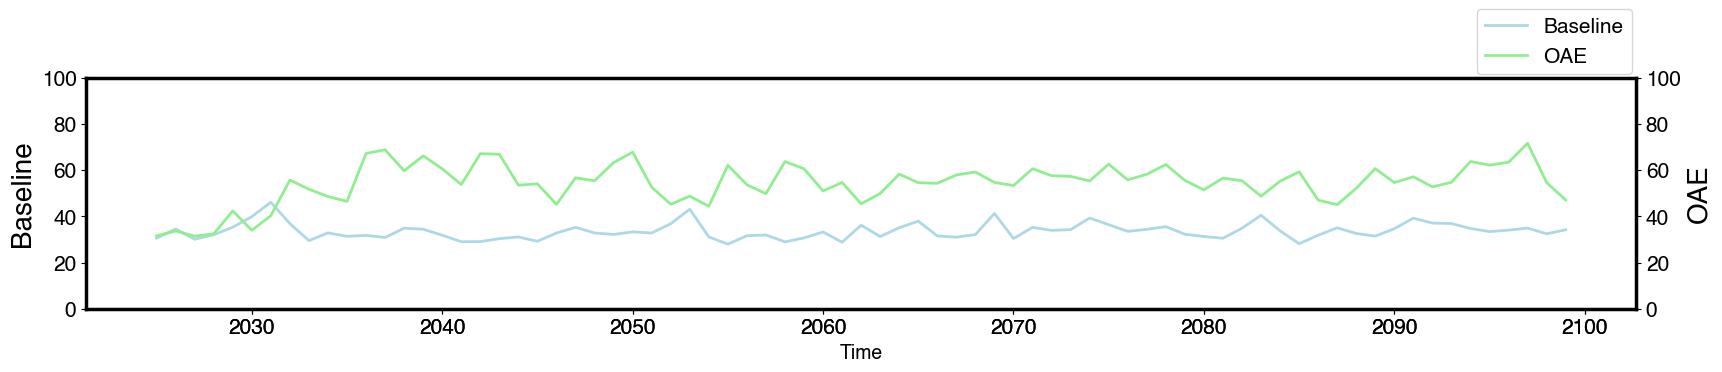

In [114]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(alk_amplitude_base_average.year, alk_amplitude_base_average.ALK, linewidth=2, color="lightblue", label = 'Baseline')
ax.set_ylabel('Baseline')
ax.set_ylim(0,100)

ax2.plot(alk_amplitude_oae_average.year, alk_amplitude_oae_average.ALK, linewidth=2, color="lightgreen", label = 'OAE')
ax2.set_ylabel('OAE')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylim(0,100)

plt.xlabel("Time", fontsize=14)

plt.title('', fontname="Helvetica", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.815, 1), loc='center left')
plt.show()